# Analysis of Provenance questions

This is the accompanying analysis of AI competencey questions in "AuditOps: A Framework for Continuous AI Auditing". The following 164 competency questions are taken from RAINS and FIDES.



## Import of necessary libraries and loading of required data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path = "/content/drive/MyDrive/question-analysis/prov_question_list.csv"
df = pd.read_csv(path, sep=";")
df.head()

Mounted at /content/drive


,source,question,category,source_category
0,RAINS,Who is the creator/supplier of this AI system?,wh_who,system
1,RAINS,What are the intended use cases or domains of this AI system?,wh_general,system
2,RAINS,Who are the intended users of this AI system?,wh_who,system
3,RAINS,Who defined the intended use cases and users of this AI system?,wh_who,system
4,RAINS,What are the compliance requirements of this AI system?,wh_general,system


## Basic statistic information









In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total number of questions: {len(df)}")
print(f"Number of sources: {df['source'].nunique()}")
print(f"Number of question categories: {df['category'].nunique()}")
print(f"Number of source categories: {df['source_category'].nunique()}")

print("\nFirst few rows:")
df.head()

Dataset Overview:
Total number of questions: 164
Number of sources: 2
Number of question categories: 6
Number of source categories: 16

First few rows:


,source,question,category,source_category
0,RAINS,Who is the creator/supplier of this AI system?,wh_who,system
1,RAINS,What are the intended use cases or domains of this AI system?,wh_general,system
2,RAINS,Who are the intended users of this AI system?,wh_who,system
3,RAINS,Who defined the intended use cases and users of this AI system?,wh_who,system
4,RAINS,What are the compliance requirements of this AI system?,wh_general,system


## Basic statistics and data quality check

In [ ]:
print("Data Quality Check:")
print(f"Missing values in source: {df['source'].isnull().sum()}")
print(f"Missing values in question: {df['question'].isnull().sum()}")
print(f"Missing values in category: {df['category'].isnull().sum()}")

print("\nUnique sources:")
print(df['source'].unique())

print("\nUnique question categories:")
print(df['category'].unique())

print("\nUnique source categories:")
print(df['source_category'].unique())

Data Quality Check:
Missing values in source: 0
Missing values in question: 0
Missing values in category: 0

Unique sources:
['RAINS' 'FIDES']

Unique question categories:
['wh_who' 'wh_general' 'yesno_followup' 'yesno_reuse' 'wh_time_place'
 'yesno_question']

Unique source categories:
[' system' ' dataset' ' infrastructure' 'infrastructure' 'ml' 'ml       '
 'evaluation' 'certificate' 'guidelines' 'compliance' 'approval'
 'development' 'model' 'dataset' 'deployment' 'execution']



## Source Analysis


In [ ]:
print("Questions by Source:")
source_counts = df['source'].value_counts()
print(source_counts)


Questions by Source:
source
RAINS    127
FIDES     37
Name: count, dtype: int64


## Analysis by category


In [ ]:
print("Questions by Category:")
category_counts = df['category'].value_counts()
print(category_counts)

category_percentages = (category_counts / len(df) * 100).round(2)
print("\nPercentage distribution by category:")
for category, percentage in category_percentages.items():
    print(f"{category}: {percentage}%")

Questions by Category:
category
wh_general        101
wh_who             43
wh_time_place      10
yesno_followup      6
yesno_reuse         3
yesno_question      1
Name: count, dtype: int64

Percentage distribution by category:
wh_general: 61.59%
wh_who: 26.22%
wh_time_place: 6.1%
yesno_followup: 3.66%
yesno_reuse: 1.83%
yesno_question: 0.61%


## Question word type analysis


Question Type Analysis:
question_type
What      73
Who       43
Which     17
Yes/No    10
Other      6
Where      6
How        5
When       4
Name: count, dtype: int64


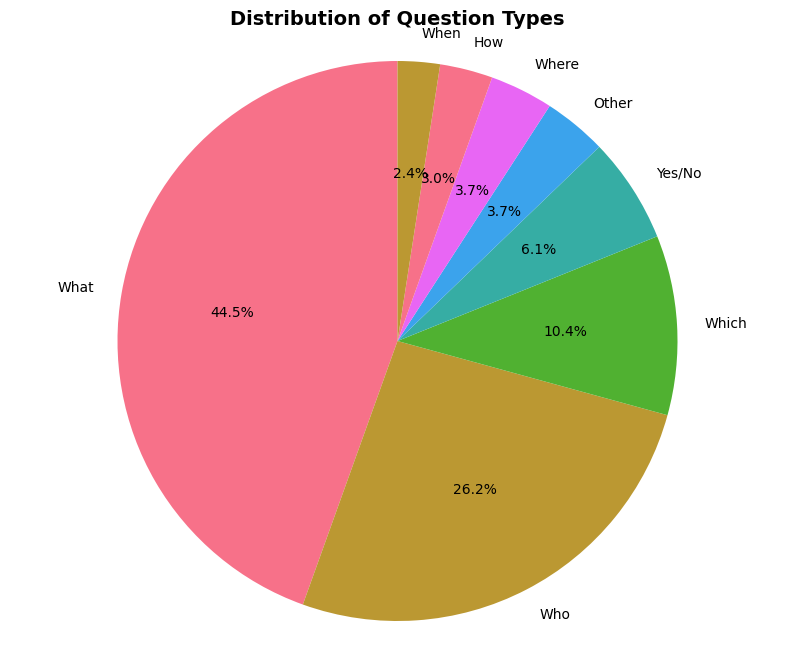

In [ ]:
def extract_question_type(question):
    """Extract question type from the question text"""
    question_lower = question.lower().strip()

    if question_lower.startswith('what'):
        return 'What'
    elif question_lower.startswith('who'):
        return 'Who'
    elif question_lower.startswith('when'):
        return 'When'
    elif question_lower.startswith('where'):
        return 'Where'
    elif question_lower.startswith('why'):
        return 'Why'
    elif question_lower.startswith('how'):
        return 'How'
    elif question_lower.startswith('which'):
        return 'Which'
    elif question_lower.startswith('was') or question_lower.startswith('is'):
        return 'Yes/No'
    else:
        return 'Other'

df['question_type'] = df['question'].apply(extract_question_type)

print("Question Type Analysis:")
question_type_counts = df['question_type'].value_counts()
print(question_type_counts)

# pie chart
plt.figure(figsize=(10, 8))
plt.pie(question_type_counts.values, labels=question_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Question Types', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

## Analysis of source categories


In [ ]:

print("Questions by Source Category:")
source_category_counts = df['source_category'].value_counts()
print(source_category_counts)

Questions by Source Category:
source_category
 dataset           31
ml                 27
approval           20
 infrastructure    13
model              11
dataset             9
compliance          9
development         8
guidelines          8
evaluation          7
 system             6
execution           5
deployment          4
infrastructure      3
certificate         2
ml                  1
Name: count, dtype: int64


## Merge source categories


Questions by Generalized Source Category:
generalized_source_category
dataset                      40
compliance & approval        39
ml model                     39
supporting infrastructure    28
evaluation                    7
system                        6
execution                     5
Name: count, dtype: int64


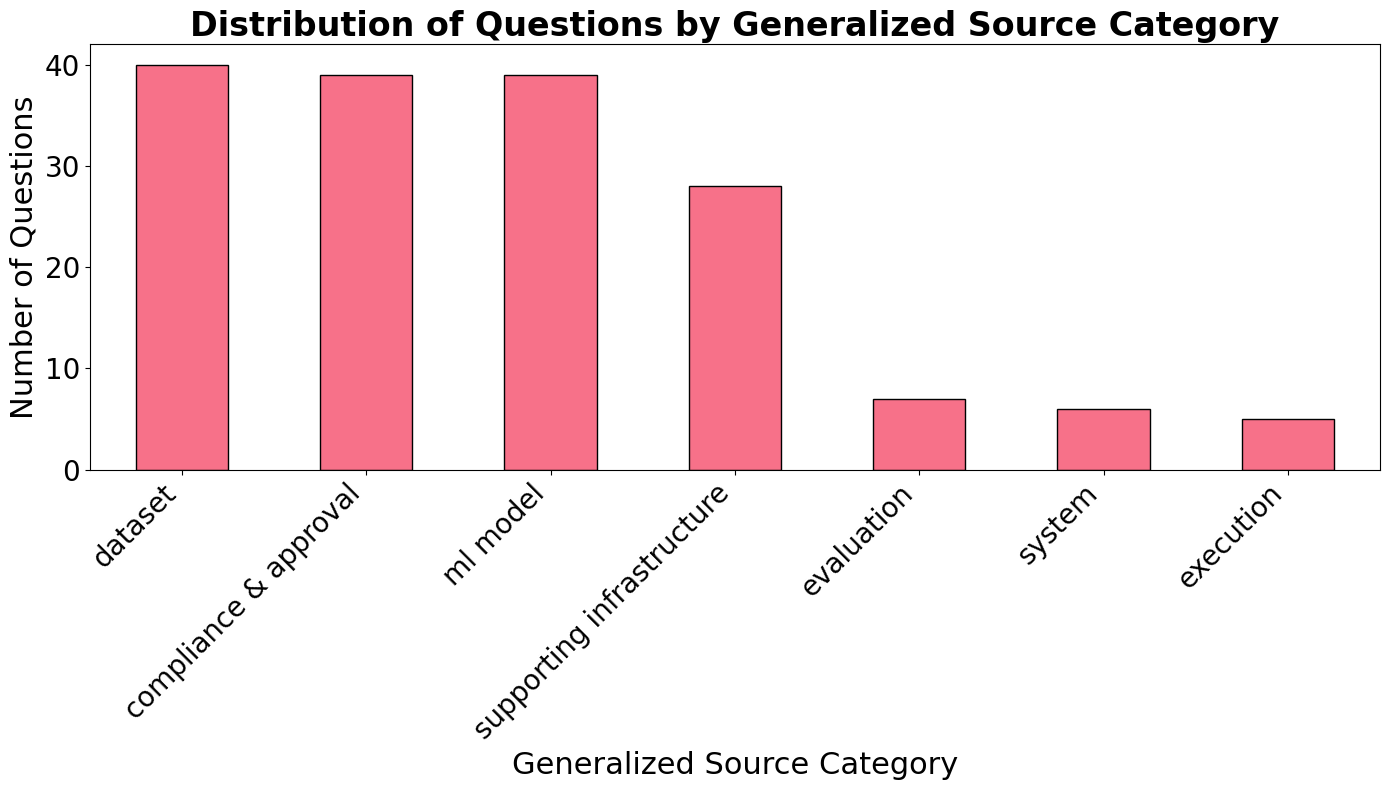

In [ ]:
sc = df["source_category"].astype(str).str.strip().str.lower()

general_map = {
    "dataset": "dataset",
    "evaluation": "evaluation",
    "execution": "execution",
    "ml": "ml model",
    "model": "ml model",
    "infrastructure": "supporting infrastructure",
    "deployment": "supporting infrastructure",
    "development": "supporting infrastructure",
    "approval": "compliance & approval",
    "compliance": "compliance & approval",
    "guidelines": "compliance & approval",
    "certificate": "compliance & approval",
    "system": "system",
}

df["generalized_source_category"] = sc.map(general_map).fillna("other")
counts = df["generalized_source_category"].value_counts()

print("Questions by Generalized Source Category:")
print(counts)
ax = counts.plot(kind="bar", edgecolor="black", figsize=(14, 8))
ax.set_title("Distribution of Questions by Generalized Source Category", fontsize=24, fontweight="bold")
ax.set_xlabel("Generalized Source Category", fontsize=22)
ax.set_ylabel("Number of Questions", fontsize=22)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Identify canoncial and lingustic templates


In [ ]:


QUESTION_COL = "question"
# 1) Normalize text
def normalize_text(s: str) -> str:
    s = str(s).strip().lower()
    s = s.replace("’", "'")
    s = re.sub(r"\bcreator\s*/\s*supplier\b", "creator or supplier", s)
    s = re.sub(r"^which is\b", "what is", s)
    s = re.sub(r"^which are\b", "what are", s)
    s = re.sub(r"\s+", " ", s)
    return s

df["q_norm"] = df[QUESTION_COL].apply(normalize_text)

# 2) Terms
OBJECT_PHRASES = sorted([
    "ai system compliance requirements",
    "ai system's purpose specification",
    "ai system purpose specification",
    "ml model evaluation",
    "supporting infrastructure",
    "design specification",
    "purpose specification",
    "training data",
    "deployment server",
    "risk and bias software",

    "this ai system",
    "this dataset",
    "this ml model",
    "this model",
    "this supporting infrastructure",
    "this infrastructure",

    "ai system",
    "dataset",
    "ml model",
    "model",
    "system",
    "infrastructure",
    "deployment",
    "execution",
    "evaluation",
    "software",
    "repository",
    "commit",
    "identifier",
    "uri",
    "path",
    "specification",
    "requirements",
    "forecast",
    "td",
], key=len, reverse=True)

ATTRIBUTE_HEADS = sorted([
    "hard and soft laws",
    "intended use cases or domains",
    "intended use cases",
    "intended use",
    "intended users",
    "compliance requirements",
    "security mechanisms",
    "audit mechanisms",
    "human oversight and human-in-control mechanisms",
    "limitations",
    "risks, including biases",
    "risks and biases",
    "risks",
    "risk",
    "biases",
    "bias",
    "mitigation strategies",
    "mitigation",
    "trade-offs",
    "version or date",
    "version",
    "date",
    "licenses",
    "license",
    "architecture",
    "evaluation results",
    "funding",
    "error metric",
    "error value",
    "forecast value",
    "incorrect use cases",
], key=len, reverse=True)

def slot_object(q: str) -> str:
    s = q
    for phrase in OBJECT_PHRASES:
        s = re.sub(rf"\b{re.escape(phrase)}\b", "{OBJECT}", s)
    s = re.sub(r"\{OBJECT\}\s+\{OBJECT\}", "{OBJECT}", s)
    return s

def slot_attribute(q: str) -> str:
    s = q
    for a in ATTRIBUTE_HEADS:
        s = re.sub(rf"\b{re.escape(a)}\b", "{ATTRIBUTE}", s)
    return s

def slot_agent(q: str) -> str:
    s = q
    s = re.sub(r"^who\b", "{AGENT}", s)
    s = re.sub(r"\bwhom\b", "{AGENT}", s)
    return s

def slot_org(q: str) -> str:
    s = q
    s = re.sub(r"\bwhich organization\b", "{ORG}", s)
    s = re.sub(r"\bwhich organisation\b", "{ORG}", s)
    return s

def cleanup_template(q: str) -> str:
    s = q
    s = re.sub(r"\b(this|that)\s+\{OBJECT\}\b", "the {OBJECT}", s)
    s = re.sub(r"\b(these|those)\s+\{OBJECT\}s\b", "the {OBJECT}", s)
    s = re.sub(r"\bof\s+\{OBJECT\}", "of the {OBJECT}", s)
    s = re.sub(r"\bfor\s+\{OBJECT\}", "for the {OBJECT}", s)
    s = re.sub(r"\bthe\s+the\b", "the", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# 3) Templates
df["template"] = (
    df["q_norm"]
      .apply(slot_attribute)
      .apply(slot_object)
      .apply(slot_agent)
      .apply(slot_org)
      .apply(cleanup_template)
)

# 4) Template counts
template_counts = df["template"].value_counts()
print("\nTop 20 exact templates (after slotting):")
print(template_counts.head(20))

total = len(df)
for k in [3, 5, 10, 15]:
    covered = int(template_counts.head(k).sum())
    print(f"Top {k} exact templates cover {covered}/{total} = {covered/total:.1%}")

# 5) Higher-level template families
ROLE_NOUNS = r"(?:creator|supplier|provider|owner|manager|maintainer|developer)"

TEMPLATE_FAMILIES = [
    ("YESNO_REUSE",
     re.compile(r"^was\s+the\s+\{OBJECT\}\s+created\s+specifically\s+for\s+this\s+\{OBJECT\}\s+or\s+was\s+it\s+reused\?\s*$")),
    ("YESNO_DEVIATION_SPEC",
     re.compile(r"^was\s+the\s+\{OBJECT\}.*different\s+from\s+its\s+design\s+specification.*\?\s*$")),
    ("YESNO_STORED",
     re.compile(r"^is\s+the\s+error\s+between\s+the\s+real\s+and\s+predicted\s+values\s+being\s+stored\?\s*$")),

    ("WHAT_TRADEOFFS",
     re.compile(r"^what\s+are\s+the\s+\{ATTRIBUTE\}\s+between\s+\{ATTRIBUTE\}\s+and\s+the\s+effects\s+of\s+using\s+the\s+\{OBJECT\}\s+on\s+humans\s+or\s+others\?\s*$")),
    ("WHAT_COMPLIANCE_CRITERION",
     re.compile(r"^what\s+\{ATTRIBUTE\}\s+does\s+the\s+\{OBJECT\}\s+comply\s+with\?\s*$")),
    ("WHAT_MITIGATION",
     re.compile(r"^what\s+are\s+the\s+\{ATTRIBUTE\}\s+to\s+address\s+the\s+\{ATTRIBUTE\}\s+of\s+the\s+\{OBJECT\}\?\s*$")),
    ("WHAT_DEPENDENCY_INPUT",
     re.compile(r"^what\s+is\s+the\s+\{OBJECT\}\s+to\s+build\s+the\s+\{OBJECT\}\?\s*$")),

    ("WHO_REUSE_FOLLOWUP",
     re.compile(r"^if\s+the\s+\{OBJECT\}\s+was\s+reused,\s+who\s+is\s+its\s+creator\s+or\s+manager\?\s*$")),
    ("WHO_ROLE_OF_OBJECT",
     re.compile(
         r"^\{AGENT\}\s+is\s+the\s+"
         + ROLE_NOUNS +
         r"(?:\s+or\s+"
         + ROLE_NOUNS +
         r")?\s+of\s+the\s+\{OBJECT\}\?\s*$"
     )),
    ("WHO_ATTRIBUTION",
     re.compile(
         r"^\{AGENT\}\s+"
         r"(approved|assured|confirmed|produced|realized|defined|created|developed|collected|preprocessed)"
         r"\b.*\?\s*$"
     )),

    ("WHAT_ATTR_OF_OBJECT",
     re.compile(r"^what\s+(is|are)\s+(the\s+)?\{ATTRIBUTE\}\s+(of|associated\s+with)\s+the\s+\{OBJECT\}\?\s*$")),
    ("WHAT_ATTR_OF_OBJECT",
     re.compile(r"^what\s+are\s+incorrect\s+use\s+cases\s+for\s+the\s+\{OBJECT\}\?\s*$")),
    ("HOW_METHOD",
     re.compile(r"^how\b.*\?\s*$")),
    ("WHERE_LOCATION",
     re.compile(r"^where\b.*\?\s*$")),
    ("WHEN_TEMPORAL",
     re.compile(r"^when\b.*\?\s*$")),
    ("WHEN_TEMPORAL",
     re.compile(r"^for\s+what\s+point\s+in\s+time\b.*\?\s*$")),
]

def assign_family(t: str) -> str:
    for name, pat in TEMPLATE_FAMILIES:
        if pat.search(t):
            return name
    return "OTHER"

df["template_family"] = df["template"].apply(assign_family)






Top 20 exact templates (after slotting):
template
what are the {ATTRIBUTE} of the {OBJECT}?                                                                      12
what {ATTRIBUTE} does the {OBJECT} comply with?                                                                 5
{AGENT} approved the {OBJECT}?                                                                                  5
{AGENT} assured the compliance of the {OBJECT} to the {ATTRIBUTE} as indicated by the {OBJECT} {ATTRIBUTE}?     4
if the {OBJECT} was reused, who is its creator or manager?                                                      3
what is the {ATTRIBUTE} of the {OBJECT}?                                                                        3
{AGENT} confirmed the fitness of the {OBJECT} for the use cases indicated by the {OBJECT}?                      3
what are the {ATTRIBUTE} to address the {ATTRIBUTE} of the {OBJECT}?                                            3
was the {OBJECT} created specifically

In [ ]:
fam_counts = df["template_family"].value_counts()
print("\nTemplate FAMILY counts (higher-level):")
print(fam_counts)

print("\nExamples per family (first 2):")
for name in fam_counts.index:
    ex = df.loc[df["template_family"] == name, QUESTION_COL].head(2).tolist()
    print(f"\n{name} (count={int(fam_counts[name])})")
    for e in ex:
        print(" -", e)


Template FAMILY counts (higher-level):
template_family
OTHER                        82
WHO_ATTRIBUTION              36
WHAT_ATTR_OF_OBJECT          16
WHAT_COMPLIANCE_CRITERION     5
HOW_METHOD                    5
WHEN_TEMPORAL                 5
WHERE_LOCATION                4
WHO_REUSE_FOLLOWUP            3
WHAT_MITIGATION               3
WHAT_TRADEOFFS                2
WHO_ROLE_OF_OBJECT            1
WHAT_DEPENDENCY_INPUT         1
YESNO_STORED                  1
Name: count, dtype: int64

Examples per family (first 2):

OTHER (count=82)
 - Who are the intended users of this AI system?
 - Was the dataset realization different from its design specification and if yes, why?

WHO_ATTRIBUTION (count=36)
 - Who defined the intended use cases and users of this AI system?
 - Who defined the compliance requirements of this AI system?

WHAT_ATTR_OF_OBJECT (count=16)
 - What are the intended use cases or domains of this AI system?
 - What are the compliance requirements of this AI system?

W